## Project: New York Subway System -- Exploration and Modeling
### Author : Qian Li
#### Analysis ongoing...

In [4]:
import pandas as pd
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6
import datetime
import numpy as np

In [3]:
%matplotlib inline

# Data Analysis 1

What is the total number of entries & exits across the subway system for August 1, 2013?

In [5]:
# load the data of the week 2013-08-03
link = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_' + '130803' +'.txt'
df = pd.read_csv(link, header = None)

# parse the data of the selected day, 2013-01-03
df_130801 = df[df[3] =='08-01-13'] 

# count the entries and exits
# because this is a cumulative data, so I will choose the last time point of a day
entries_total = df_130801[41].sum()
exits_total = df_130801[42].sum() 

print("2013-08-01, total entries:", entries_total)
print("2013-08-01, total exits:", exits_total)

2013-08-01, total entries: 23073433547.0
2013-08-01, total exits: 14621682708.0


#  Data Analysis 2

Let’s define the busy-ness as sum of entry & exit count.

What station was the busiest on August 1, 2013?

What turnstile was the busiest on that date?

In [6]:
stations = df_130801.groupby(df_130801[1]).sum() # group by stations
stations[43] = stations[41] + stations[42] # sum the entries & exits

devices = df_130801.groupby([1,2]).sum() # group by stations and devices
devices[43] = devices[41] + devices[42] # sum the entries & exits

print('2013-08-01, the busiest station:', stations[43].idxmax())
print('2013-08-01, the busiest turnstile:', devices[43].idxmax())


2013-08-01, the busiest station: R275
2013-08-01, the busiest turnstile: ('R275', '00-00-00')


#  Data Analysis 3
*What were the busiest and least-busy stations in the system over all of July 2013*


In [7]:
# load the data
dates_indexs = ['130706', '130713', '130720', '130727', '130803']

links = []
for i in range(len(dates_indexs)):
    links.append('http://web.mta.info/developers/data/nyct/turnstile/turnstile_'+ dates_indexs[i] +'.txt')

mydfs = {}
for i in range(len(links)):   
    mydfs[dates_indexs[i]] = pd.read_csv(links[i], header = None, usecols = list(range(43)))


# mydfs contains the data of August 2013, which should not be included.
# Only select the data of July 2013, and store it in a single dataframe 

df_201307 = pd.DataFrame() 
for key in mydfs:
    df = mydfs[key]
    df = df[df[3].str.contains('07-')]
    df_201307 = df_201307.append(df)


stations_201307 = df_201307.groupby(df_201307[1]).sum() # group by stations
stations_201307[43] = stations_201307[41] + stations_201307[42] # sum the entries and exits

print('In July 2013, the busiest station:', stations_201307[43].idxmax())
print('In July 2013, the least-busy station:', stations_201307[43].idxmin())

In July 2013, the busiest station: R275
In July 2013, the least-busy station: R014


#  Data Analysis 4

Which station had the highest average number of entries between midnight & 4am on Fridays in July 2013?

In [8]:
# select the days which are fridays
fridays = ['07-05-13', '07-12-13', '07-19-13', '07-26-13']

df_fridays = pd.DataFrame()
for i in fridays:
    df = df_201307[df_201307[3] == i]
    df_fridays = df_fridays.append(df)

# select the time period: midnight to 4am
df_fridays_midnight_to_4am = df_fridays[(df_fridays[4] == '00:00:00') & (df_fridays[9] == '04:00:00')]



# drop the exits from the dataframe
entries_index = [6,11,16,21,26,31,36,41]
exits_index = [(i+1) for i in entries_index]

df_fridays_midnight_to_4am.drop(df_fridays_midnight_to_4am.columns[exits_index], axis = 1, inplace = True)
df_fridays_midnight_to_4am = df_fridays_midnight_to_4am.loc[:,0:11]

device_per_station = df_fridays_midnight_to_4am[1].value_counts()



# Let's write a funtion to calculate the average entries of a station
# Average entries = Total entries of a station / number of devices
# the Average entries will be stored in a column 'ave_entries'

stations = df_fridays_midnight_to_4am.groupby(df_fridays_midnight_to_4am[1]).sum()
stations['midnight_4am'] = stations[11] - stations[6] 
stations['device_per_station'] = device_per_station
stations['ave_entries'] = stations['midnight_4am'] / stations['device_per_station']

print('In July 2013, between midnight & 4am on Fridays, Station', stations['ave_entries'].idxmax(), 'had the highest average number of entries ')


In July 2013, between midnight & 4am on Fridays, Station R235 had the highest average number of entries 


c:\program files\python36\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# Data Analysis 5
What stations have seen the most usage growth/decline in the last year?-2016

In [ ]:
# Import the data between 2016-01-02 and 2016-12-31
# 52 datasets in total, store all of them in a dictonary: mydfs

base = datetime.date(2016,1,2)    
dates = [base + datetime.timedelta(i*7) for i in range(0, 53)]
dates = [dates[i].strftime('%y%m%d') for i in range(len(dates))] # convert the format

links = []
for i in range(len(dates)):
    links.append('http://web.mta.info/developers/data/nyct/turnstile/turnstile_'+ dates[i] +'.txt')

mydfs = {}
for i in range(len(links)):   
    mydfs[dates[i]] = pd.read_csv(links[i], header = 0, usecols = list(range(11)))


# As it is a fairly large dataset, save it in a pickle for conveninence
    # import pickle
    # pickle.dump(mydfs, open( "mydfs_2016.p", "wb" ) ) 
    # mydfs = pickle.load( open( "mydfs_2016.p", "rb" ) )


# Group the data by stations and store all the data in a dataframe: stations   
stations = pd.DataFrame()
for key in mydfs:
    df = mydfs[key]
    df = df.groupby(df['UNIT']).sum()
    df = df.sum(axis = 1)
    df = df.rename(key)
    df = df.to_frame()
    df = df.transpose()
    stations = stations.append(df)

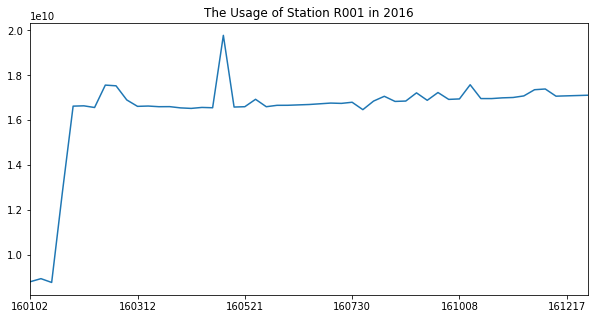

In [31]:
#  draw the plots of first 4 stations, and examine their usage patterns in 2016
stations['R001'].plot(figsize = (10,5))
plt.title('The Usage of Station R001 in 2016')

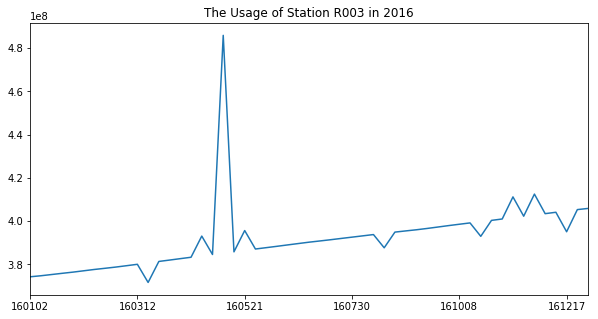

In [30]:
stations['R003'].plot(figsize = (10,5))
plt.title('The Usage of Station R003 in 2016')

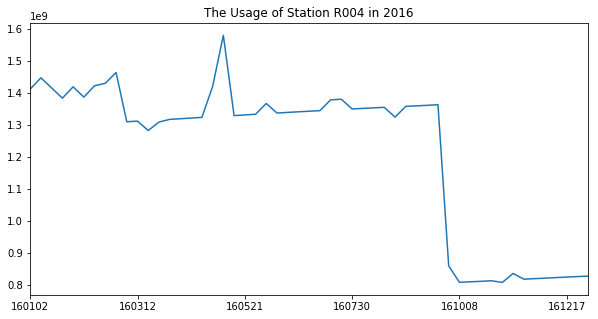

In [29]:
stations['R004'].plot(figsize = (10,5))
plt.title('The Usage of Station R004 in 2016')

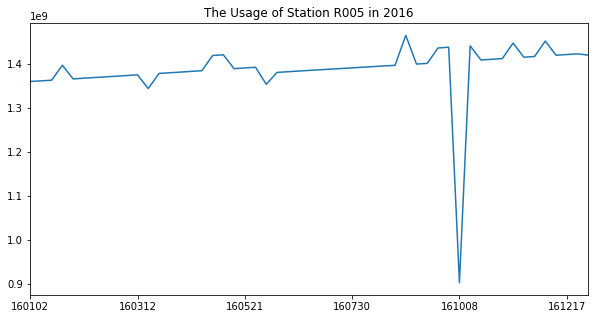

In [28]:
stations['R005'].plot(figsize = (10,5))
plt.title('The Usage of Station R005 in 2016')

The plots show that most stations' usages increases/decrease by seasons, despite some unusual ups and downs in certain days.

Thus, we can use this funtion: usage of Quarter 4 - the usage of Quarter 1 to roughly tell the usage growth/decline of a station in a year.


In [33]:
df_Q1 = stations.loc['160102':'160326', :]
df_Q4 = stations.loc['161011':'161231', :]

df_Q1_total = df_Q1.sum(axis = None)
df_Q4_total = df_Q4.sum(axis = None)

diff = df_Q4_total - df_Q1_total

print('In 2016, the most usage growth: Station', diff.idxmax())
print('In 2016, the most usage decline: Station', diff.idxmin())

In 2016, the most usage growth: Station R118
In 2016, the most usage decline: Station R080


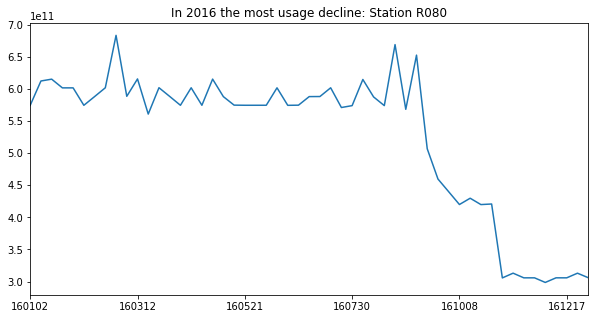

In [40]:
stations['R080'].plot(figsize = (10,5))
plt.title('In 2016 the most usage decline: Station R080')

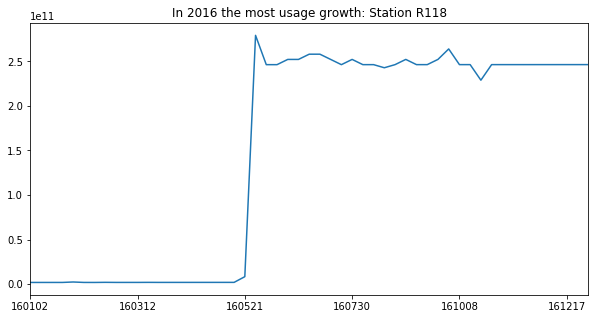

In [39]:
stations['R118'].plot(figsize = (10,5))
plt.title('In 2016 the most usage growth: Station R118')

# Data Analysis 6

What dates are the least busy?

Could you identify days on which stations were not operating at full capacity or closed entirely?

In 2016, the least busy day is: 03/13/2016
In 2016, the busiest day is: 12/14/2016


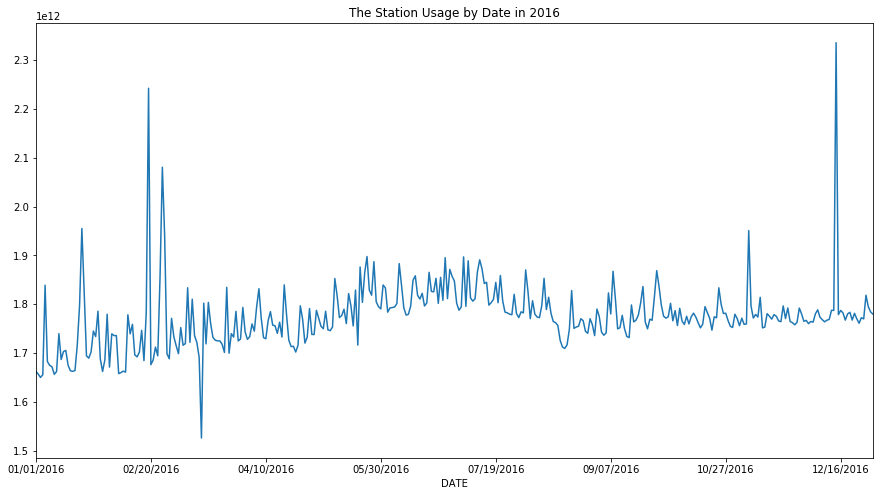

In [32]:
df_2016_by_days = pd.DataFrame()   

for key in mydfs:
    df = mydfs[key]
    df = df.groupby(['DATE']).sum()
    df_2016_by_days = df_2016_by_days.append(df)

# drop the data between '12/26/2015'and '12/31/2015'
df_2016_by_days = df_2016_by_days.drop(df_2016_by_days.index[1:7])   
    
df_2016__by_days_total = df_2016_by_days.sum(axis = 1)

print('In 2016, the least busy day is:',df_2016__by_days_total.idxmin())
print('In 2016, the busiest day is:', df_2016__by_days_total.idxmax())

df_2016__by_days_total.plot(figsize = (15,8))
plt.title('The Station Usage by Date in 2016')

Let's check the distribution of the station usage in the year of 2016

And then create a threshold:

    if the usage > = top 20% percentile, it indicates the stations are running beyond the full capacity on that day
    if the usage < =  bottom 20% percentile, it indicates the stations are not running at full capacity on that day


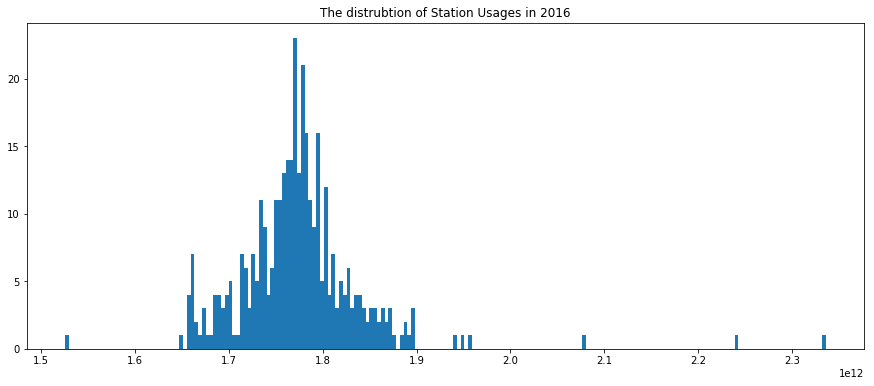

In [44]:
# check the distribution
plt.hist(df_2016__by_days_total, bins = 200)
plt.title('The distrubtion of Station Usages in 2016')

In [45]:
# define the threshold
top_20 = df_2016__by_days_total.quantile(q = 0.8)
bottom_20 = df_2016__by_days_total.quantile(q = 0.2)

# use the threshold to check the days on which stations are not running at full capacity
days_not_full_capacity = df_2016__by_days_total[df_2016__by_days_total < bottom_20]

print('The stations were not running at the full capacity at the following days:')
print(days_not_full_capacity.index)

The stations were not running at the full capacity at the following days:
Index(['01/01/2016', '01/02/2016', '01/03/2016', '01/04/2016', '01/06/2016',
       '01/07/2016', '01/08/2016', '01/09/2016', '01/10/2016', '01/12/2016',
       '01/13/2016', '01/14/2016', '01/15/2016', '01/16/2016', '01/17/2016',
       '01/18/2016', '01/19/2016', '01/23/2016', '01/24/2016', '01/25/2016',
       '01/29/2016', '01/30/2016', '01/31/2016', '02/02/2016', '02/06/2016',
       '02/07/2016', '02/08/2016', '02/09/2016', '02/13/2016', '02/14/2016',
       '02/15/2016', '02/17/2016', '02/20/2016', '02/21/2016', '02/22/2016',
       '02/23/2016', '02/27/2016', '02/28/2016', '03/02/2016', '03/03/2016',
       '03/05/2016', '03/06/2016', '03/08/2016', '03/11/2016', '03/12/2016',
       '03/13/2016', '03/15/2016', '03/18/2016', '03/19/2016', '03/20/2016',
       '03/21/2016', '03/22/2016', '03/23/2016', '03/25/2016', '03/27/2016',
       '03/29/2016', '03/30/2016', '04/02/2016', '04/09/2016', '04/10/2016',
  

#  Modeling  

Let’s develop a model for 4hr-interval exit count by turnstile device 

What features were explored? 

How does this model perform?

What is our predicted exit count for R195 during the 16:00-20:00 interval on Friday September 6, 2013?


In [ ]:
# Let's choose the data in the year of 2013 from Jan 1 to Sep 14
# we will split the data into train and test data afterwards

base = datetime.date(2013,1,5)    
dates = [base + datetime.timedelta(i*7) for i in range(0, 37)]
dates = [dates[i].strftime('%y%m%d') for i in range(len(dates))] # convert the format

links = []
for i in range(len(dates)):
    links.append('http://web.mta.info/developers/data/nyct/turnstile/turnstile_'+ dates[i] +'.txt')

mydfs= {}
for i in range(len(links)):   
    mydfs[dates[i]] = pd.read_csv(links[i], header = None, usecols = list(range(43)))  


# As it is a fairly large dataset, save it in a pickle for conveninence
#==============================================================================
#import pickle
#pickle.dump(mydfs, open( "mydfs_2013.p", "wb" ) ) 
#mydfs = pickle.load( open( "mydfs_2013.p", "rb" ) )
#==============================================================================

# select the station R195 and combine it in a single dataframe
df_R195 = pd.DataFrame()
for key in mydfs:
    df = mydfs[key]
    df.columns = ['Area', 'Station', 'SCP', 
               'Date1','Time1', 'Status1', 'Entry1', 'Exit1',
               'Date2','Time2', 'Status2', 'Entry2', 'Exit2',
               'Date3','Time3', 'Status3', 'Entry3', 'Exit3',
               'Date4','Time4', 'Status4', 'Entry4', 'Exit4',
               'Date5','Time5', 'Status5', 'Entry5', 'Exit5',
               'Date6','Time6', 'Status6', 'Entry6', 'Exit6',
               'Date7','Time7', 'Status7', 'Entry7', 'Exit7',
               'Date8','Time8', 'Status8', 'Entry8', 'Exit8',]
    df = df[df['Station'] == 'R195']
    df_R195 = df_R195.append(df)




In [47]:
#==============================================================================
# # save it in a pickle
import pickle
# pickle.dump(df_R195, open( "df_R195_2013.p", "wb" ) ) 
df_R195 = pickle.load( open( "df_R195_2013.p", "rb" ) )
df_R195.head()

,Area,Station,SCP,Date1,Time1,Status1,Entry1,Exit1,Date2,Time2,...,Date7,Time7,Status7,Entry7,Exit7,Date8,Time8,Status8,Entry8,Exit8
9636,N203,R195,00-00-00,12-29-12,03:22:00,REGULAR,3450210,3401303,12-29-12,07:22:00,...,12-29-12,20:10:44,LOGON,3451322.0,3402112.0,12-29-12,20:11:17,DOOR CLOSE,3451322.0,3402112.0
9637,N203,R195,00-00-00,12-29-12,20:13:59,LGF-MAN,3451322,3402112,12-29-12,23:22:00,...,12-30-12,03:22:00,REGULAR,3451395.0,3402190.0,12-30-12,07:22:00,REGULAR,3451411.0,3402213.0
9638,N203,R195,00-00-00,12-30-12,11:22:00,REGULAR,3451496,3402270,12-30-12,15:22:00,...,12-31-12,11:22:00,REGULAR,3452218.0,3402926.0,12-31-12,15:22:00,REGULAR,3452447.0,3403154.0
9639,N203,R195,00-00-00,12-31-12,19:22:00,REGULAR,3452627,3403405,12-31-12,23:22:00,...,01-01-13,19:22:00,REGULAR,3453060.0,3403838.0,01-01-13,23:22:00,REGULAR,3453108.0,3403905.0
9640,N203,R195,00-00-00,01-02-13,03:22:00,REGULAR,3453119,3403924,01-02-13,07:22:00,...,01-03-13,03:22:00,REGULAR,3454168.0,3404838.0,01-03-13,07:22:00,REGULAR,3454286.0,3404894.0


In [48]:
# check the Station's Area code with Reomote Booth Station.xlsx
# Station R195, "161 ST YanKee", has six unique Area codes 
df_R195['Area'].unique()


# Area code is not useful for prediction, so we drop it
df_R195.drop('Area', axis = 1, inplace = True)


 
# now we need to reformat the dataframe, make it in a time series shape
df = pd.DataFrame()

for i in list(range(1,9)):
    tempdf = df_R195[['Station', 'SCP',
                'Date'+str(i),
                'Time'+str(i), 
                'Status'+str(i), 
                'Entry'+str(i), 
                'Exit'+str(i)]]
    tempdf.columns = ['Station', 'SCP','Date','Time', 'Status', 'Entry', 'Exit']
    df = df.append(tempdf)


#  Data cleaning 

In [49]:
#==============================================================================
# # so "df" is the new dataframe we're going to work on
# # first drop the rows without Date values
#==============================================================================
df = df.dropna(subset=['Date'])


# next we need to sum up the devices on the same time & on same day
df = df.groupby(['Date','Time', 'Status']).sum()


# conver the index into three columns
combined = pd.concat([df.reset_index()[['Date', 'Time', 'Status']].apply(pd.Series), 
                          df.reset_index(drop=True)], 
                          axis=1)

# drop the data in 2012
combined = combined[combined['Date'].str.contains('-13')]

# combine "Date" and "Time" and set it as Datetime Index
combined = combined.set_index(pd.to_datetime(combined['Date'] + ' ' + combined['Time']))


# Further cleaning up: drop the time which is not between four hour intervals
# The way to do it is to keep the rows whose time format is:  "**:22:00" 

combined = combined[combined['Time'].str.contains(':22:00')]

# drop the duplicates with dame data and time (which refers to the unregular status)
combined = combined.drop_duplicates(['Date', 'Time'])

# the following line can also be used to remove the rows with unregular status
# but I didn't use it, because it creates too many missing data.
# combined2 = combined[combine['Status'] == 'REGULAR'] 

# Finally, drop the 'Date', 'Time', 'Status'
combined.drop(['Date', 'Time','Status'], axis = 1, inplace = True)



##### Now the dataset is very clean and ready for modeling!

Let's first take a look at the trends of our selected Station, R195. 

The plot shows gradual usage growth of Station R195 from Jan 2013 to Sep 2013 

In [53]:
combined.head(12)

,Entry,Exit
2013-01-01 03:22:00,57308825.0,43088232.0
2013-01-01 07:22:00,57309553.0,43088773.0
2013-01-01 11:22:00,57310969.0,43089369.0
2013-01-01 15:22:00,57313168.0,43090433.0
2013-01-01 19:22:00,57315755.0,43092329.0
2013-01-01 23:22:00,57317073.0,43093590.0
2013-01-02 03:22:00,57317475.0,43094076.0
2013-01-02 07:22:00,57319975.0,43094558.0
2013-01-02 11:22:00,57326441.0,43097377.0
2013-01-02 15:22:00,57331818.0,43100057.0


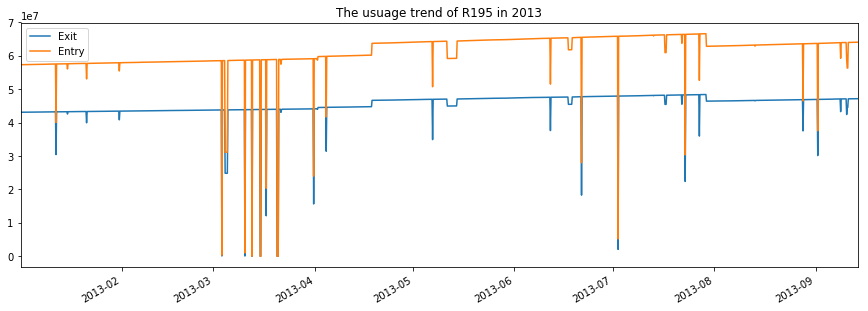

In [52]:
# check the usage trends
combined[['Exit', 'Entry']].plot(figsize = (15,5))
plt.title('The usuage trend of R195 in 2013')

In [54]:
#==============================================================================
# let's first try regression model and SVM
#==============================================================================
from sklearn import preprocessing, cross_validation, svm

shift_windows = 6
combined['ShiftBack_Exit'] = combined['Exit'].shift(-shift_windows)
combined.dropna(inplace=True)

x = np.array(combined['Exit'])
y = np.array(combined['ShiftBack_Exit'])

x = x.reshape((len(x),1))
y = y.reshape((len(y),1))

x = preprocessing.scale(x)

x_train, x_test, y_train, y_test = cross_validation.train_test_split(x, y, test_size = 0.2)


ModuleNotFoundError: No module named 'sklearn'

###### Regression modeling

In [ ]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression(n_jobs=-1)
clf.fit(x_train, y_train)
confidence = clf.score(x_test, y_test)
print(confidence)


###### Support Vector Machines

In [ ]:
clf = svm.SVR()
clf.fit(x_train, y_train)
confidence = clf.score(x_test, y_test)
print("SVP Confidence：", confidence)

for k in ['linear','poly','rbf','sigmoid']:
    clf = svm.SVR(kernel=k)
    clf.fit(x_train, y_train)
    confidence = clf.score(x_test, y_test)
    print(k,confidence)
    

The confidence levels are extremely low for both Regression and SVM. So they are not propoer methods to use.
It also makes sense because regression and SVM fail to consider the time as a factor.
##### Now let's try Time Series-Based methods

# 1 Moving Average and Stationarity Test

In [ ]:
def test_stationarity(timeseriesdata):
    # Rolling Mean and Rolling Standard deviation    
    rolmean = pd.rolling_mean(timeseriesdata, window = 6) # choose 6 as the window size, given 4 hour interval, 24/4=6.
    rolstd = pd.rolling_std(timeseriesdata, window = 6) 
    
    #Plot rolling statistics:
    timeseriesdata.plot(label = 'Original')
    rolmean.plot(label = 'Rolling Mean')
    rolstd.plot(color = 'red', label = 'Rolling Standard Deviation')
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    
    #Perform Dickey-Fuller test:(check the stationarity)
    from statsmodels.tsa.stattools import adfuller
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseriesdata, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    
    
test_stationarity(combined['Exit'])   

The test statistic is smaller than the 5% critical value, so we can say with 95% confidence that this is a stationary series.


we can do a log transformation to increase the stationarity of the data


In [ ]:
ts_log = np.log(combined['Exit'])
ts_log_rolmean = pd.rolling_mean(ts_log, 6)
plt.plot(ts_log, color = 'blue')
plt.plot(ts_log_rolmean, color = 'red')

ts_log_rolmean_diff = ts_log - ts_log_rolmean
ts_log_rolmean_diff.dropna(inplace = True)
test_stationarity(ts_log_rolmean_diff)

# the test statistic is smaller than the 1% critical value, which is better than the previous one


# 2 Exponentially Weighted Moving Average

In [ ]:
#==============================================================================
# this method gives the  more recent values a higher weight 
#==============================================================================

expweighted_rolmean = pd.ewma(ts_log, 6)
plt.plot(ts_log, color = 'blue')
plt.plot(expweighted_rolmean, color = 'red')

ts_log_expweighted_rolmean_diff = ts_log - expweighted_rolmean
test_stationarity(ts_log_expweighted_rolmean_diff)

# the test result is even better.


# 3 Decomposing and Modeling the trend and seasonality

###### decompose data into: trend, seasonality and residuals

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log,freq=6)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

fig = plt.figure(figsize=(20, 8))
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

#### Remove trend and seasonality with first order differencing

In [ ]:
ts_log_diff = ts_log - ts_log.shift(1)
plt.plot(ts_log_diff )

ts_log_diff.dropna(inplace = True)
test_stationarity(ts_log_diff) 


###### ACF and PACF plots:

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

PACF: the first point drops to 0, p = 1

ACF: the first point cross the upper confidence interval, q = 1

In [ ]:
#==============================================================================
# #### now we're going to model the residuals
#==============================================================================
ts_log_decompose = residual
ts_log_decompose.dropna(inplace = True)
test_stationarity(ts_log_decompose)


from statsmodels.tsa.arima_model import ARIMA

# fit model
model = ARIMA(ts_log, order=(1,1,1)) # order = (p, d, q)
model_fit = model.fit(disp=-1)

fig = plt.figure(figsize=(16, 8))
plt.plot(ts_log_diff)
plt.plot(model_fit.fittedvalues, color = 'red')
plt.legend()
plt.title('RSS: %.4f'% sum((model_fit.fittedvalues-ts_log_diff)**2))


# Model Validaton 

###### Measure the variance between the data and predicted values

In [ ]:
print(model_fit.summary())
predictions = pd.DataFrame(model_fit.fittedvalues)
residuals = pd.DataFrame(model_fit.resid)

predictions.plot(color = 'red')
plt.title('ARIMA Predictions')
residuals.plot(color = 'blue')
plt.title('ARIMA Residual Error')
plt.show()

# Distrubtion of the residual error
residuals.plot(kind='kde')
plt.title('ARIMA Residual Error')
plt.show()
print(residuals.describe())

# the model validation indicates the model runs good results


### Take it back to the original scale

In [ ]:
ts = combined['Exit']

predictions_ARIMA_diff = pd.Series(model_fit.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

# Remove the first order differeencing and take exponent to restore the predicitions back to original scale
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA - ts)**2)/len(ts)))

predict = predictions_ARIMA['2013-09-06 20:22:00'] - predictions_ARIMA['2013-09-06 16:22:00']
real = combined.loc['2013-09-06 20:22:00','Exit'] - combined.loc['2013-09-06 16:22:00','Exit']

print('The exit count for R195 during the 16:00-20:00 interval on Friday September 6, 2013')
print('Predicted value：',  predict)
print('Real value：', real)


In [2]:
%pwd

'C:\\WINDOWS\\system32'